# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.

len(data_complete["Mouse ID"].unique())


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped = data_complete.groupby(["Mouse ID", "Timepoint"])["Timepoint"].count()

grouped
duplicates = grouped[(grouped > 1)]
duplicates_array = duplicates.index.unique("Mouse ID").values
duplicates_array

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id_data = data_complete[(data_complete["Mouse ID"] == duplicates_array[0])]
duplicate_id_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_complete = data_complete[(data_complete["Mouse ID"] != duplicates_array[0])]
data_complete.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_mean = data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_mean

drug_median = data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_median

drug_variance = data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_variance

drug_standard_deviation = data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_standard_deviation 

drug_standard_error = data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
drug_standard_error

new_data = pd.DataFrame({
    "Mean Tumor Volume": drug_mean,
    "Median Tumor Volume" : drug_median,
    "Tumor Volume Variance" : drug_variance,
    "Tumor Volume Std. Dev." : drug_standard_deviation, 
    "Tumor Volume Std. Err" : drug_standard_error
})
new_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)


drug_mean_agg = data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(np.mean)
drug_median_agg = data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(np.median)
drug_variance_agg = data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(np.var)
drug_standard_dev_agg = data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(np.std)
drug_standard_error_agg = data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(st.sem)

# Using the aggregation method, produce the same summary statistics in a single line
data_agg = data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median","var","std","sem"])
data_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

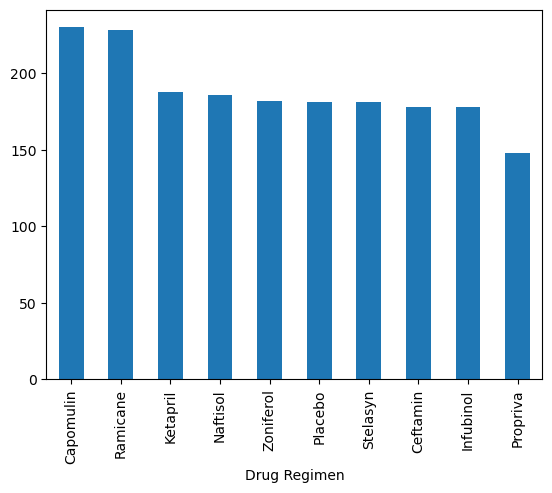

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
data_complete.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending=False).plot.bar()


<function matplotlib.pyplot.show(close=None, block=None)>

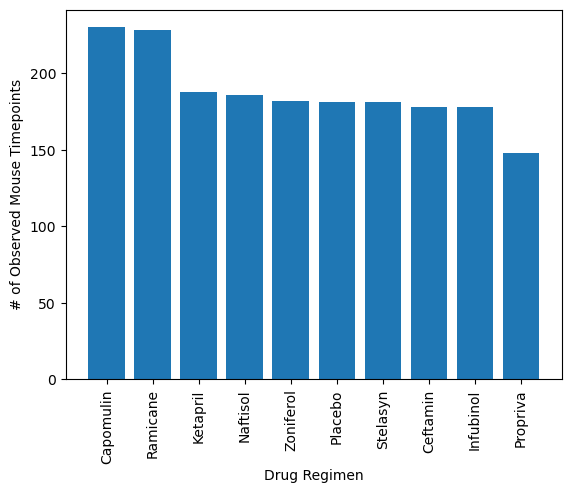

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plot_data = data_complete.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending=False)
plt.bar(plot_data.axes[0].array, plot_data.values)
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.show

<Axes: ylabel='Sex'>

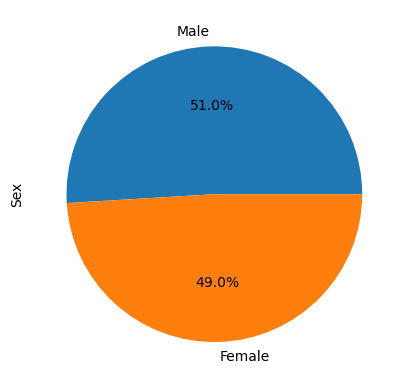

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data_complete.groupby("Sex")["Sex"].count().sort_values(ascending=False).plot.pie(autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

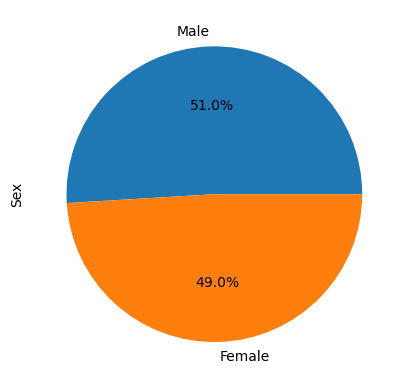

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_data = data_complete.groupby("Sex")["Sex"].count().sort_values(ascending=False)
pie_data
plt.pie(pie_data.values,labels=pie_data.axes[0].array, autopct="%1.1f%%")
plt.ylabel("Sex")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tumor_data = data_complete.groupby("Mouse ID")["Timepoint"].max()
last_tumor_data

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_tumor_data = pd.merge(data_complete, last_tumor_data, how="left", on=["Mouse ID", "Mouse ID"])
merged_tumor_data

merged_tumor_data_unique = merged_tumor_data[(merged_tumor_data["Timepoint_x"]== merged_tumor_data["Timepoint_y"])]
merged_tumor_data_unique

merged_tumor_data_unique = merged_tumor_data_unique.reset_index()
merged_tumor_data_unique

,index,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
0,1,f932,0,45.000000,0,Ketapril,Male,15,29,0
1,20,x336,0,45.000000,0,Naftisol,Female,4,29,0
2,53,h428,0,45.000000,0,Ketapril,Female,1,27,0
3,55,v199,0,45.000000,0,Naftisol,Female,17,29,0
4,108,o848,0,45.000000,0,Stelasyn,Female,14,27,0
...,...,...,...,...,...,...,...,...,...,...
243,1875,r944,45,41.581521,2,Capomulin,Male,12,25,45
244,1876,u364,45,31.023923,3,Capomulin,Male,18,17,45
245,1877,p438,45,61.433892,1,Ceftamin,Female,11,26,45
246,1878,x773,45,58.634971,4,Placebo,Female,21,30,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data_list = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment_name in treatments_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_tumor_data_unique[(merged_tumor_data_unique["Drug Regimen"]== treatment_name)]
    tumor_volumes = treatment_data["Tumor Volume (mm3)"]
    # add subset
    tumor_vol_data_list.append(tumor_volumes)

    # Determine outliers using upper and lower bounds
    q3, q1 = np.percentile(tumor_volumes, [75,25])
    iqr = q3 - q1

    whisker_q1 = q1 - (iqr*1.5)
    whisker_q3 = q3 + (iqr*1.5)
       
    outliers = tumor_volumes[((tumor_volumes < whisker_q1) | (tumor_volumes > whisker_q3))]
    print(treatment_name + "'s potential outliers:" + str(outliers))
    

    


Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


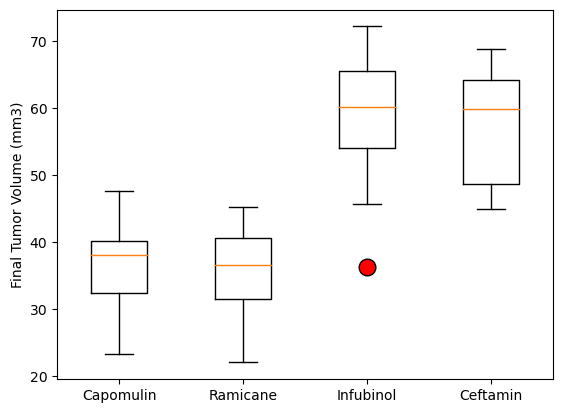

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data_list,flierprops = dict(marker = "o", markerfacecolor = "red", markersize=12))
ax1.set_ylabel("Final Tumor Volume (mm3)")
plt.xticks([1,2,3,4],treatments_list)
plt.show()

## Line and Scatter Plots

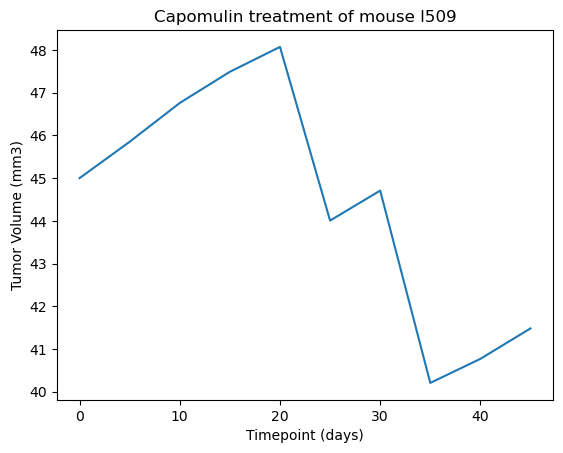

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509_data = data_complete[data_complete["Mouse ID"] == "l509"]
mouse_l509_data

x = mouse_l509_data["Timepoint"]
y = mouse_l509_data["Tumor Volume (mm3)"]
plt.plot(x, y)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

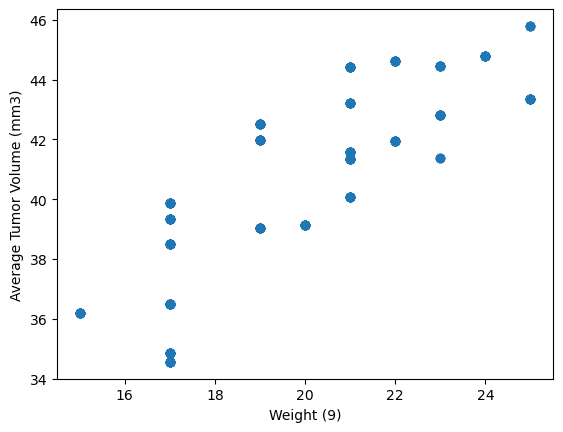

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mean_data_per_mouse = data_complete.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()


capomulin_data = pd.merge(data_complete, mean_data_per_mouse, how="left", on=["Mouse ID", "Mouse ID"])
capomulin_data = capomulin_data[(capomulin_data["Drug Regimen"] =="Capomulin")]
capomulin_data

x_data = capomulin_data["Weight (g)"]
y_data = capomulin_data["Tumor Volume (mm3)_y"]
          

plt.scatter(x_data, y_data)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (9)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and tumor volume is 0.83


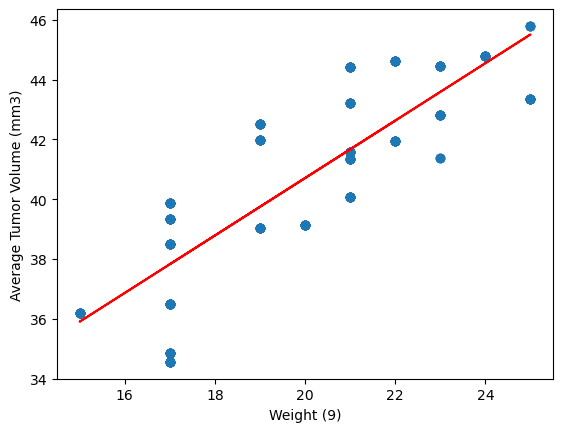

PearsonRResult(statistic=0.8343958614425966, pvalue=6.495737656132108e-61)

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_correlation = st.pearsonr(x_data, y_data)
mouse_correlation[0]
print(f"The correlation between mouse weight and tumor volume is {round(mouse_correlation[0],2)}")
mouse_correlation

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_data, y_data)
regress_values = x_data * slope + intercept

plt.scatter(x_data, y_data)
plt.plot(x_data, regress_values, "r-")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (9)")
plt.show()

mouse_correlation